In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Student_Performance_new.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df = data.copy()
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
df['Extracurricular Activities'] = lab_enc.fit_transform(df['Extracurricular Activities'])
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


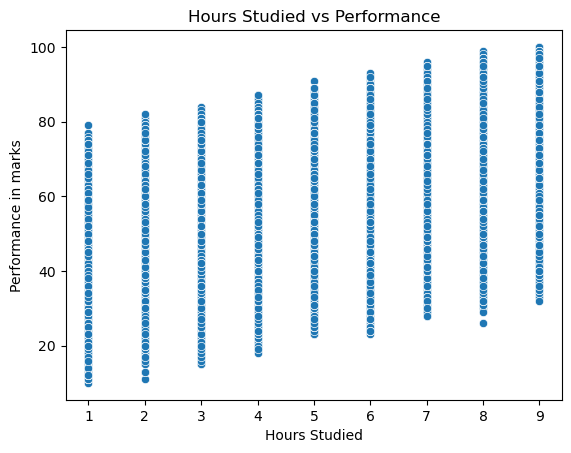

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Hours Studied', y='Performance Index')
plt.title('Hours Studied vs Performance')
plt.xlabel('Hours Studied')
plt.ylabel('Performance in marks')
plt.show()

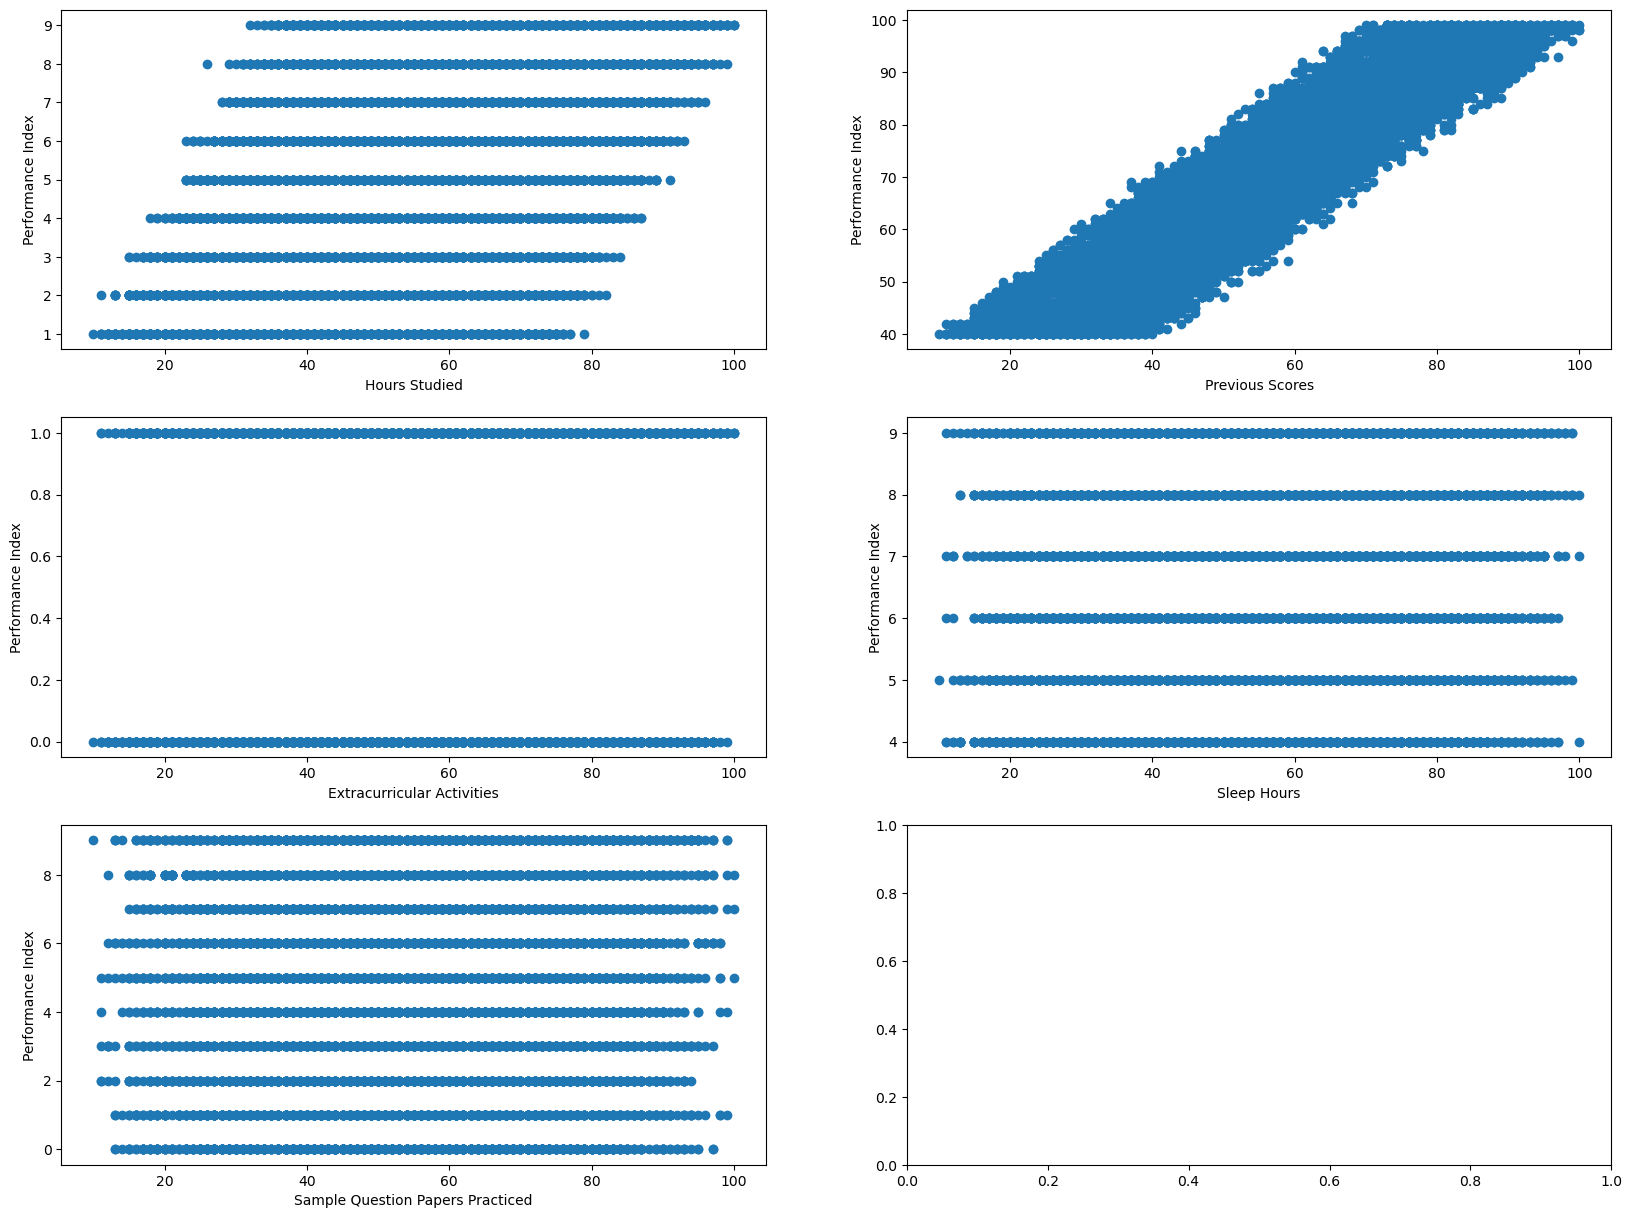

In [58]:
# fig, axes = plt.subplots(2, 3, figsize=(20, 15))
# axes = axes.flatten()

# for i, column in enumerate(df.columns[:-1]):
#     ax = axes[i]
#     ax.scatter(df[df.columns[-1]], df[column])
#     ax.set_xlabel(column)
#     ax.set_ylabel('Performance Index')
# plt.show()

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes=axes.flatten()

for i, column in enumerate(df.columns[:-1]):
    ax = axes[i]
    ax.scatter(df[df.columns[-1]], df[column])
    ax.set_xlabel(column)
    ax.set_ylabel(df.columns[-1])
plt.show()

1. Creating a Grid of Subplots:
 
plt.subplots(3, 2, figsize=(20, 15)) creates a figure (fig) with a grid of 3 rows and 2 columns, resulting in a total of 6 subplots (axes).
figsize=(20, 15) sets the size of the figure to 20 inches by 15 inches.
axes.flatten() flattens the grid into a 1D array (axes) so that we can easily access each subplot by index.

2. Looping Through Columns and Plotting:
 
df.columns[:-1] gets all columns except the last one, assuming the last column is the target variable (Performance Index).
enumerate(df.columns[:-1]) iterates through each feature column, where i is the index, and column is the column name.
For each column, the corresponding subplot ax is accessed using axes[i].
ax.scatter(df[df.columns[-1]], df[column]) plots a scatter plot of the target variable (df[df.columns[-1]], the last column in df) against the current feature (df[column]).
ax.set_xlabel(column) sets the x-axis label to the feature name (column).
ax.set_ylabel('Performance Index') labels the y-axis as "Performance Index."

<Axes: >

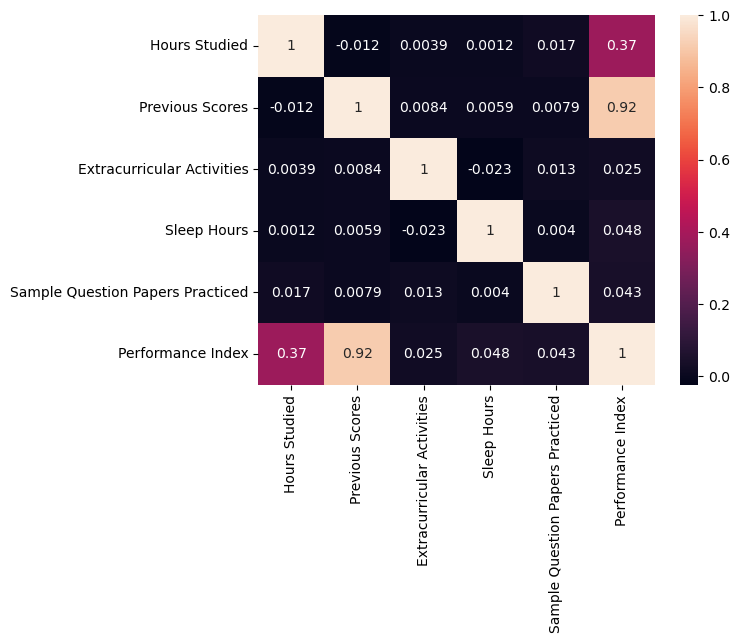

In [57]:
#Find the correlation between the feature vectors and target vector
sns.heatmap(df.corr(), annot=True)

In [26]:
correlation = df['Hours Studied'].corr(df['Performance Index'])
correlation

0.3737303506987239

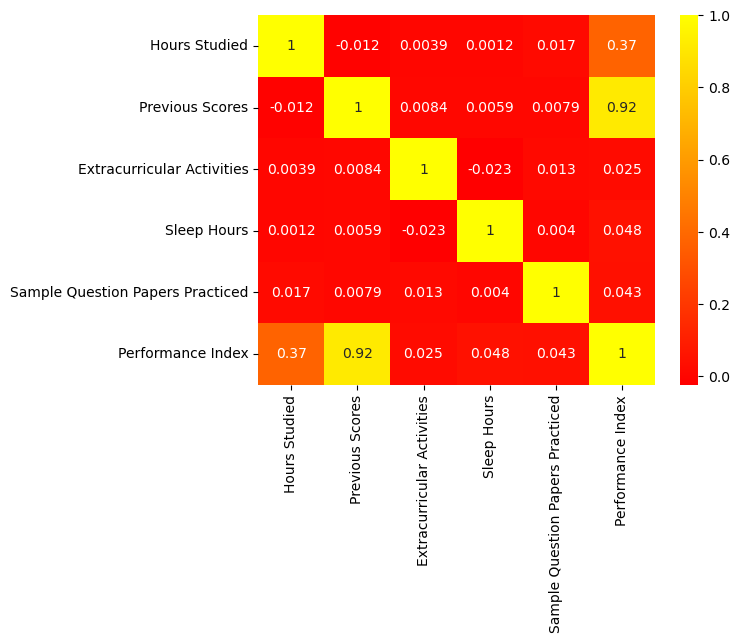

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='autumn')
plt.show()

In [61]:
#Drop columns that have less correlation with the target column

target_col = df.columns[-1]
corr = df.corr()[target_col].abs()
high_corr_cols = corr[corr > 0.2].index
new_df = df[high_corr_cols]

1. Identifying the Target Column:

df.columns[-1] selects the last column of the DataFrame df.
target_col will be used as the reference column for calculating correlations.

2. Calculating Absolute Correlations:

df.corr() computes the pairwise correlation of all columns in df.
df.corr()[target_col] extracts the correlation values between the target column (target_col) and all other columns.
.abs() takes the absolute value of these correlations, as we are interested in both positive and negative correlations above a certain threshold (in this case, 0.2).

3. Selecting Columns with High Correlation:

corr[corr > 0.2] filters the correlations to only include those greater than 0.2.
.index extracts the names of the columns with correlations above 0.2, creating an index (or list) of column names (high_corr_cols).

**Purpose of the Code**

The purpose of this code is to create a subset of df containing only the columns that are strongly correlated (absolute correlation above 0.2) with the target column. This is a common technique in feature selection to focus analysis on the most relevant variables, potentially improving model performance by reducing noise from weakly correlated features.

In [60]:
new_df

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
...,...,...,...
9995,1,49,23.0
9996,7,64,58.0
9997,6,83,74.0
9998,9,97,95.0


In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours Studied      10000 non-null  int64  
 1   Previous Scores    10000 non-null  int64  
 2   Performance Index  10000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

scaler.transform(x_train)
scaler.transform(x_test)

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print("R2 Score : ", end="")
print(r2_score(y_test, prediction))
      
print("Mean absolute error : ", end="")
print(mean_absolute_error(y_test, prediction))

R2 Score : 0.9890110607021136
Mean absolute error : 1.6090437564045217


**Purpose of MinMaxScaler**

The MinMaxScaler is often used to normalize data when you want all features to be on a similar scale, especially in algorithms where feature scale affects performance, such as linear regression, neural networks, or K-means clustering.